### Overfitting and regularization
#### Housing

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

from useful.eda import basic_info

In [18]:
#basic_info.data_info(house_prices_df,'saleprice')

#### Create Dummy Columns

In [19]:
house_prices_df = pd.concat(
    [house_prices_df,
     pd.get_dummies(
         house_prices_df.mszoning, 
         prefix="mszoning", 
         drop_first=True)], 
    axis=1)

house_prices_df = pd.concat(
    [house_prices_df,
     pd.get_dummies(
         house_prices_df.street, 
         prefix="street", 
         drop_first=True)], 
    axis=1)

dummy_column_names = list(
    pd.get_dummies(
        house_prices_df.mszoning, 
        prefix="mszoning", 
        drop_first=True).columns)

dummy_column_names = dummy_column_names + list(
    pd.get_dummies(
        house_prices_df.street, 
        prefix="street", 
        drop_first=True).columns)

#### Make the X & Y values

In [20]:
X = house_prices_df[[
    'overallqual', 
    'grlivarea', 
    'garagecars', 
    'garagearea', 
    'totalbsmtsf'
    ] + dummy_column_names
]

Y = house_prices_df.saleprice

#### Split into training & test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


#### Run the model - Regular 'Ol Linear Regression

In [24]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     383.1
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        08:51:03   Log-Likelihood:                -13972.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1157   BIC:                         2.802e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.039e+05   2.06e+04     -5.037      

##### Evaluation

R^2 & Adj R^2 are 0.786 and 0.766 respectively while Prob F-stat is 0

#### Predict

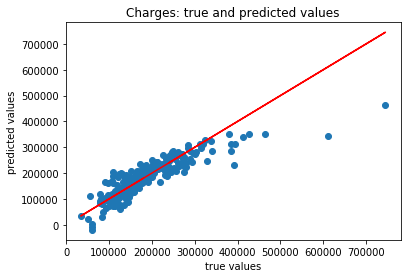

Mean absolute error of the prediction is: 25546.803828588643
Mean squared error of the prediction is: 1559083821.9730175
Root mean squared error of the prediction is: 39485.23549344764
Mean absolute percentage error of the prediction is: 15.551420347537665


In [25]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

#We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



#### Evaluation




#### Ridge Regression

In [41]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=1)
ridgeregr.fit(X_train, y_train)

#prediction time
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print(f"R^2 train {ridgeregr.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {ridgeregr.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")


R^2 train 0.7680010617052181
-test stats-
R^2 test 0.7676094288873447
MAE prediction 25568.66557674715
MSE prediction 1560201525.217235
RMSE prediction 39499.38639038884
MA%E prediction 182848.66601211193


#### Lasso

In [52]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10)
lassoregr.fit(X_train, y_train)

#prediction time
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print(f"R^2 train {lassoregr.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {lassoregr.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")


R^2 train 0.76800784764796
-test stats-
R^2 test 0.7677451919995409
MAE prediction 25557.82564801336
MSE prediction 1559290051.8570957
RMSE prediction 39487.846888088185
MA%E prediction 182849.07138287445


#### Elasticnet regression

In [57]:
from sklearn.linear_model import ElasticNet

ElasticNetregr = ElasticNet(alpha=0.001)
ElasticNetregr.fit(X_train, y_train)

#prediction time
y_preds_train = ElasticNetregr.predict(X_train)
y_preds_test = ElasticNetregr.predict(X_test)

print(f"R^2 train {ElasticNetregr.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {ElasticNetregr.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")


R^2 train 0.7680143130059536
-test stats-
R^2 test 0.7676558402021861
MAE prediction 25559.747038222595
MSE prediction 1559889933.3834693
RMSE prediction 39495.44193174029
MA%E prediction 182847.31437307462


##### Evaluation

-All of the alpha values were relatively low in comparison to the example.

#### Use CV to find the best alpha

In [65]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

#### Elasticnet CV

In [64]:
from sklearn.linear_model import ElasticNetCV

ElasticNetregrCV = ElasticNetCV(alphas=alphas, cv=5)
ElasticNetregrCV.fit(X_train, y_train)

#prediction time
y_preds_train = ElasticNetregrCV.predict(X_train)
y_preds_test = ElasticNetregrCV.predict(X_test)

print("Best alpha value is: {}".format(ElasticNetregrCV.alpha_))
print(f"R^2 train {ElasticNetregrCV.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {ElasticNetregrCV.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")

Best alpha value is: 0.01
R^2 train 0.7678925153819995
-test stats-
R^2 test 0.7676453805577793
MAE prediction 25567.300532077246
MSE prediction 1559960156.3407888
RMSE prediction 39496.33092251467
MA%E prediction 182845.66710350983


#### Lasso CV

In [66]:
from sklearn.linear_model import LassoCV

LassoregrCV = LassoCV(alphas=alphas, cv=5)
LassoregrCV.fit(X_train, y_train)

#prediction time
y_preds_train = LassoregrCV.predict(X_train)
y_preds_test = LassoregrCV.predict(X_test)

print("Best alpha value is: {}".format(LassoregrCV.alpha_))
print(f"R^2 train {LassoregrCV.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {LassoregrCV.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")

Best alpha value is: 100.0
R^2 train 0.7678047359412336
-test stats-
R^2 test 0.7678676963052431
MAE prediction 25550.279035003157
MSE prediction 1558467594.200199
RMSE prediction 39477.43145393579
MA%E prediction 182850.32781557174


#### Ridge CV

In [67]:
from sklearn.linear_model import RidgeCV

RidgeregrCV = RidgeCV(alphas=alphas, cv=5)
RidgeregrCV.fit(X_train, y_train)

#prediction time
y_preds_train = RidgeregrCV.predict(X_train)
y_preds_test = RidgeregrCV.predict(X_test)

print("Best alpha value is: {}".format(RidgeregrCV.alpha_))
print(f"R^2 train {RidgeregrCV.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {RidgeregrCV.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")

Best alpha value is: 10.0
R^2 train 0.7678338103945404
-test stats-
R^2 test 0.7678244205564297
MAE prediction 25539.732544149636
MSE prediction 1558758134.7715325
RMSE prediction 39481.111113689956
MA%E prediction 182837.80204113838


#### Normalize Y

In [68]:
X = X
Y = np.log1p(house_prices_df['saleprice'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

#### ElasticNet again

In [69]:
from sklearn.linear_model import ElasticNetCV

ElasticNetregrCV = ElasticNetCV(alphas=alphas, cv=5)
ElasticNetregrCV.fit(X_train, y_train)

#prediction time
y_preds_train = ElasticNetregrCV.predict(X_train)
y_preds_test = ElasticNetregrCV.predict(X_test)

print("Best alpha value is: {}".format(ElasticNetregrCV.alpha_))
print(f"R^2 train {ElasticNetregrCV.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {ElasticNetregrCV.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")

Best alpha value is: 0.0001
R^2 train 0.8211618044577551
-test stats-
R^2 test 0.832597441171097
MAE prediction 0.12334848797265634
MSE prediction 0.02791364828553429
RMSE prediction 0.16707378096378345
MA%E prediction 12.03339333315208


Normalizing y increases the effectiveness of the model signficantly

#### Lasso one more time...

In [70]:
from sklearn.linear_model import LassoCV

LassoregrCV = LassoCV(alphas=alphas, cv=5)
LassoregrCV.fit(X_train, y_train)

#prediction time
y_preds_train = LassoregrCV.predict(X_train)
y_preds_test = LassoregrCV.predict(X_test)

print("Best alpha value is: {}".format(LassoregrCV.alpha_))
print(f"R^2 train {LassoregrCV.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {LassoregrCV.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")

Best alpha value is: 0.0001
R^2 train 0.8210469638994399
-test stats-
R^2 test 0.8318704063894927
MAE prediction 0.12348580472107867
MSE prediction 0.02803487817190534
RMSE prediction 0.1674361913443606
MA%E prediction 12.033419281522328


#### Ridge

In [71]:
from sklearn.linear_model import RidgeCV

RidgeregrCV = RidgeCV(alphas=alphas, cv=5)
RidgeregrCV.fit(X_train, y_train)

#prediction time
y_preds_train = RidgeregrCV.predict(X_train)
y_preds_test = RidgeregrCV.predict(X_test)

print("Best alpha value is: {}".format(RidgeregrCV.alpha_))
print(f"R^2 train {RidgeregrCV.score(X_train, y_train)}")
print("-test stats-")
print(f"R^2 test {RidgeregrCV.score(X_test, y_test)}")
print(f"MAE prediction {mean_absolute_error(y_test,y_preds_test)}")
print(f"MSE prediction {mse(y_test, y_preds_test)}")
print(f"RMSE prediction {rmse(y_test, y_preds_test)}")
print(f"MA%E prediction {np.mean(np.abs((y_test, y_preds_test)))}")

Best alpha value is: 1.0
R^2 train 0.8205847130206674
-test stats-
R^2 test 0.8288619246325264
MAE prediction 0.12405221927846372
MSE prediction 0.028536529414424475
RMSE prediction 0.16892758630379018
MA%E prediction 12.033497855404299
